In [1]:
#Importing New library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
#setting options to show max rows and max columns.
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
print('Training data:',df.shape)

Training data: (1168, 81)


In [5]:
df.isnull().sum() 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

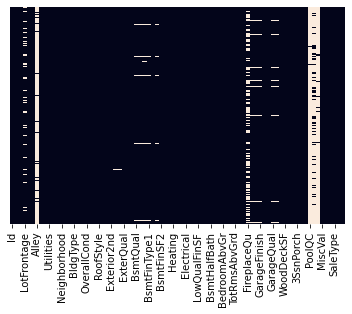

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
#Filling Missing Value as it a float data we can filll it by mean method.

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
#Dropping Alley Because it has more than 75% of null value

df.drop(['Alley'],axis=1,inplace=True)



In [10]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])




In [11]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [12]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType1'].mode()[0])

In [13]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])


In [14]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
#Dropping these as these columns have more more than 75% of Null data.
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)


In [16]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [17]:
df.drop(['Id'],axis=1,inplace=True)

In [18]:
df.shape

(1168, 76)

<AxesSubplot:>

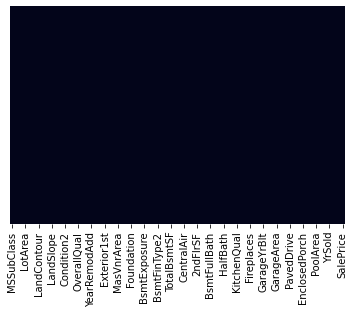

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [20]:
 df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.198559,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.193841,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
df_test=pd.read_csv('New_test_data.csv')


In [22]:
#Combining  Training data and test data:
DF=[df,df_test]
DF_combo=pd.concat(DF).reset_index(drop=True)

In [23]:
DF_combo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000.0,NaN
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000.0,NaN
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790.0,NaN
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000.0,NaN
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000.0,NaN


In [24]:
DF_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [25]:
DF_combo.drop(['Id'],axis=1,inplace=True) #As it is Unique feature

In [26]:
s = (DF_combo.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (DF_combo.dtypes == 'int64')
num_cols = list(s[s].index)
print("Integer variables:")
print(num_cols)

s = (DF_combo.dtypes == 'float')
num_cols = list(s[s].index)
print("Real variables:")
print(num_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Integer variables:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

<AxesSubplot:title={'center':'Number Of Unique value of the categorical Features'}>

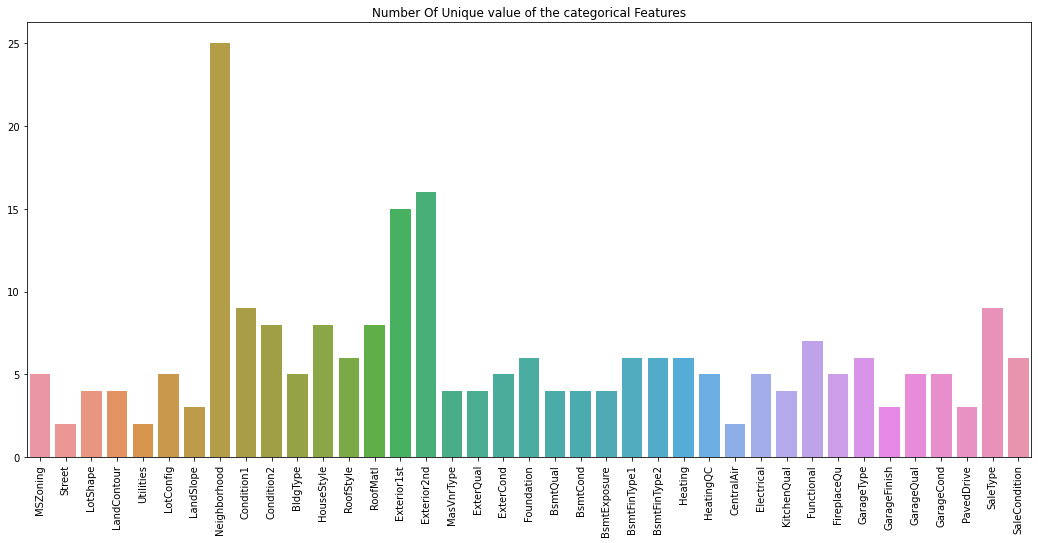

In [27]:
unique_val=[]
for col in object_cols:
    unique_val.append (DF_combo[col].unique().size)
plt.figure(figsize=(18,8))
plt.title('Number Of Unique value of the categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_val)

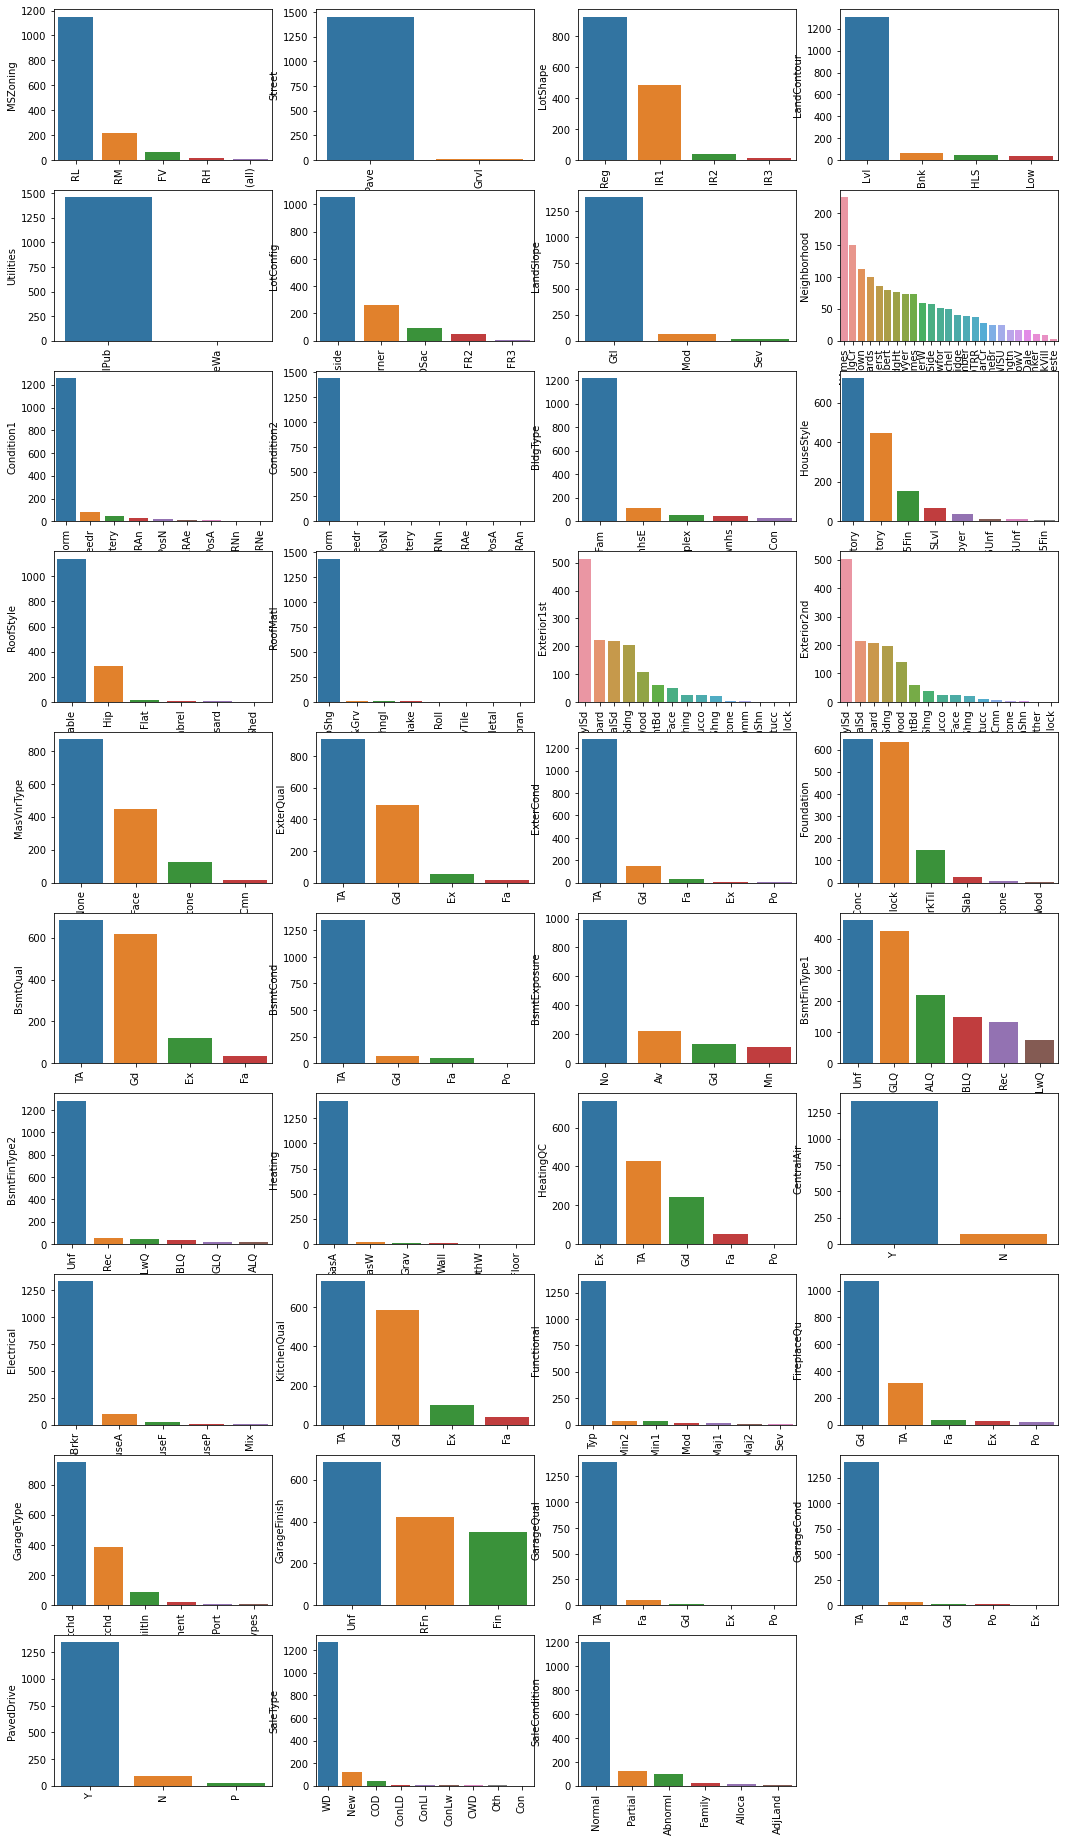

In [28]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index=1
for col in object_cols:
    y= DF_combo[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

In [29]:
DF_combo['SalePrice']=DF_combo['SalePrice'].fillna(df['SalePrice'].mean())

In [30]:
print(DF_combo.isnull().sum().sum())

0


**Data Preprocessing**

In [31]:
#using One hot encorder to encode categorical features

from sklearn.preprocessing import OneHotEncoder

In [32]:
s = (DF_combo.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

print('No. of Categorical Features :', len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
No. of Categorical Features : 39


In [33]:
ohe = OneHotEncoder(sparse=False)
OHE_cols=pd.DataFrame(ohe.fit_transform(DF_combo[object_cols]))
OHE_cols.index=DF_combo.index
OHE_cols.columns=ohe.get_feature_names()             # Combining categorical features data into numerical value with the help of OneHotEncoder and combining it with our final database. 
df_final=DF_combo.drop(object_cols,axis=1)
df_final=pd.concat([df_final,OHE_cols],axis=1)

In [34]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM,x1_Grvl,x1_Pave,x2_IR1,x2_IR2,x2_IR3,x2_Reg,x3_Bnk,x3_HLS,x3_Low,x3_Lvl,x4_AllPub,x4_NoSeWa,x5_Corner,x5_CulDSac,x5_FR2,x5_FR3,x5_Inside,x6_Gtl,x6_Mod,x6_Sev,x7_Blmngtn,x7_Blueste,x7_BrDale,x7_BrkSide,x7_ClearCr,x7_CollgCr,x7_Crawfor,x7_Edwards,x7_Gilbert,x7_IDOTRR,x7_MeadowV,x7_Mitchel,x7_NAmes,x7_NPkVill,x7_NWAmes,x7_NoRidge,x7_NridgHt,x7_OldTown,x7_SWISU,x7_Sawyer,x7_SawyerW,x7_Somerst,x7_StoneBr,x7_Timber,x7_Veenker,x8_Artery,x8_Feedr,x8_Norm,x8_PosA,x8_PosN,x8_RRAe,x8_RRAn,x8_RRNe,x8_RRNn,x9_Artery,x9_Feedr,x9_Norm,x9_PosA,x9_PosN,x9_RRAe,x9_RRAn,x9_RRNn,x10_1Fam,x10_2fmCon,x10_Duplex,x10_Twnhs,x10_TwnhsE,x11_1.5Fin,x11_1.5Unf,x11_1Story,x11_2.5Fin,x11_2.5Unf,x11_2Story,x11_SFoyer,x11_SLvl,x12_Flat,x12_Gable,x12_Gambrel,x12_Hip,x12_Mansard,x12_Shed,x13_ClyTile,x13_CompShg,x13_Membran,x13_Metal,x13_Roll,x13_Tar&Grv,x13_WdShake,x13_WdShngl,x14_AsbShng,x14_AsphShn,x14_BrkComm,x14_BrkFace,x14_CBlock,x14_CemntBd,x14_HdBoard,x14_ImStucc,x14_MetalSd,x14_Plywood,x14_Stone,x14_Stucco,x14_VinylSd,x14_Wd Sdng,x14_WdShing,x15_AsbShng,x15_AsphShn,x15_Brk Cmn,x15_BrkFace,x15_CBlock,x15_CmentBd,x15_HdBoard,x15_ImStucc,x15_MetalSd,x15_Other,x15_Plywood,x15_Stone,x15_Stucco,x15_VinylSd,x15_Wd Sdng,x15_Wd Shng,x16_BrkCmn,x16_BrkFace,x16_None,x16_Stone,x17_Ex,x17_Fa,x17_Gd,x17_TA,x18_Ex,x18_Fa,x18_Gd,x18_Po,x18_TA,x19_BrkTil,x19_CBlock,x19_PConc,x19_Slab,x19_Stone,x19_Wood,x20_Ex,x20_Fa,x20_Gd,x20_TA,x21_Fa,x21_Gd,x21_Po,x21_TA,x22_Av,x22_Gd,x22_Mn,x22_No,x23_ALQ,x23_BLQ,x23_GLQ,x23_LwQ,x23_Rec,x23_Unf,x24_ALQ,x24_BLQ,x24_GLQ,x24_LwQ,x24_Rec,x24_Unf,x25_Floor,x25_GasA,x25_GasW,x25_Grav,x25_OthW,x25_Wall,x26_Ex,x26_Fa,x26_Gd,x26_Po,x26_TA,x27_N,x27_Y,x28_FuseA,x28_FuseF,x28_FuseP,x28_Mix,x28_SBrkr,x29_Ex,x29_Fa,x29_Gd,x29_TA,x30_Maj1,x30_Maj2,x30_Min1,x30_Min2,x30_Mod,x30_Sev,x30_Typ,x31_Ex,x31_Fa,x31_Gd,x31_Po,x31_TA,x32_2Types,x32_Attchd,x32_Basment,x32_BuiltIn,x32_CarPort,x32_Detchd,x33_Fin,x33_RFn,x33_Unf,x34_Ex,x34_Fa,x34_Gd,x34_Po,x34_TA,x35_Ex,x35_Fa,x35_Gd,x35_Po,x35_TA,x36_N,x36_P,x36_Y,x37_COD,x37_CWD,x37_Con,x37_ConLD,x37_ConLI,x37_ConLw,x37_New,x37_Oth,x37_WD,x38_Abnorml,x38_AdjLand,x38_Alloca,x38_Family,x38_Normal,x38_Partial
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [35]:
df_final.shape

(1460, 276)

**Model Selection And Prediction**

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

**Submission of data**

In [40]:
#SVM – Support vector Machine
#SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.3225477873270126


In [42]:
#Random Forest Regression
#Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
 
mean_absolute_percentage_error(Y_test, Y_pred)

0.165176514636297

In [43]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
model_XGBR.fit(X_train,Y_train)
Y_pred = model_XGBR.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

26387.5689347937


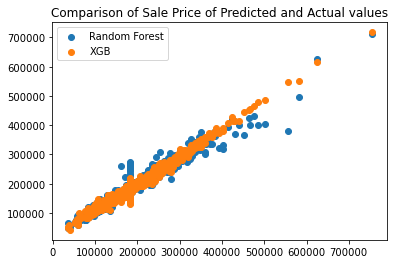

In [45]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_train,model_RFR.predict(X_train),label='Random Forest')
plt.scatter(Y_train,model_XGBR.predict(X_train),label='XGB')
plt.legend()

In [47]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()

n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]
objectives     = ['reg:squarederror']

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,
    'objective' : objectives
    }

grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)

grid_cv.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [48]:
grid_cv.best_score_

-26023.66392234415

In [49]:
grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
Y_pred = model_RFR.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

27145.8480973799


In [54]:
regressor = grid_cv.best_estimator_
Y_pred = regressor.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

26478.89467858651


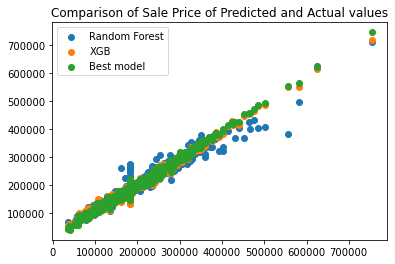

In [55]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_train,model_RFR.predict(X_train),label='Random Forest')
plt.scatter(Y_train,model_XGBR.predict(X_train),label='XGB')
plt.scatter(Y_train,regressor.predict(X_train),label='Best model')
plt.legend()

In [62]:
Y_Pred = regressor.predict(X_test)

In [63]:
Y_Pred

array([174441.77 , 121315.97 , 150917.94 , 137925.86 , 113467.15 ,
       354478.78 , 208073.39 , 251321.33 , 329442.94 , 176100.58 ,
       189869.9  , 205634.23 , 149480.9  , 185996.7  , 196898.61 ,
       229168.9  , 165624.69 , 141106.02 , 149477.75 , 158913.55 ,
       285795.56 , 114412.92 ,  70239.086, 126785.22 , 128834.42 ,
       186784.78 , 144995.31 , 177616.8  , 224745.06 , 254240.64 ,
       178042.98 ,  76795.53 , 226069.55 , 202561.52 , 145527.7  ,
       132431.75 , 185807.36 , 191972.67 , 175215.61 , 280816.44 ,
       141927.8  , 115299.61 , 291623.62 , 188418.94 ,  95704.28 ,
       219715.02 ,  99711.24 , 216247.92 , 151383.8  , 151885.73 ,
       145171.38 , 177427.11 , 183439.3  , 158164.58 , 237213.83 ,
       135420.23 , 190392.73 , 177322.9  , 127869.8  , 141833.7  ,
        88216.27 , 150440.   , 260142.61 , 240270.92 , 137374.16 ,
       183661.75 , 172822.05 , 255417.42 , 278290.38 , 162519.16 ,
       161592.77 , 118228.945, 144410.55 , 214645.34 , 149098.

In [64]:
Y_Pred.shape

(292,)

In [59]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = Y_Pred

In [60]:
sub.head()

,Id,SalePrice
0,337,174441.765625
1,1018,121315.968750
2,929,150917.937500
3,1148,137925.859375
4,1227,113467.148438


In [61]:
sub.tail()

,Id,SalePrice
287,83,190657.906250
288,1048,146186.343750
289,17,180183.656250
290,523,179344.000000
291,1379,137988.140625


In [65]:
sub.to_csv('HousingPred.csv')